In [1]:
from google.colab import drive
drive.mount('/gdrive')

ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd
from datetime import datetime
import os

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", 900)

In [5]:
try:
  FILE_PATH = "/gdrive/MyDrive/멋사_팀프로젝트_이희희/2차_프로젝트/Code/재난문자/공공데이터_크롤링/safety_msg_crawling_total.csv"
  msg_total=pd.read_csv(FILE_PATH)
except Exception as e:
  temp_path = input("위의 파일 경로가 잘못되었습니다. 좌측 폴더 아이콘을 눌러 불러올 csv 파일 경로를 입력해주세요.")
  msg_total=pd.read_csv(temp_path)

위의 파일 경로가 잘못되었습니다. 좌측 폴더 아이콘을 눌러 불러올 csv 파일 경로를 입력해주세요./content/safety_msg_crawling_total.csv


In [6]:
msg_total

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2021-07-02 10:24:18,104,대구광역시 전체,110649,[대구광역시] 2일 0시 기준 확진자 9명(동구3 북구2 서구1 수성구1 달서구1 달성군1)발생. 의심시 외출 자제 및 가까운 보건소 예약 후 검사 바랍니다.,cbs
1,2021-07-02 10:22:59,98,광주광역시 전체,110648,"[광주광역시] 6.18.(금)~6.30.(수) 보보스(BOBOS)호프(북구 대자로 72-1, 운암동)에 방문하신 분은 거주지 보건소에서 검사받으시기 바랍니다.",cbs
2,2021-07-02 10:16:02,23,경기도 고양시,110647,"[고양시청]7.1.(목) 일일 확진자 33명(덕양구9,일산동구14,일산서구9,타지역 거주1) ▶타지역확진 고양시민 2명 https://han.gl/iMmgw 참조",cbs
3,2021-07-02 10:11:29,58,경상남도 남해군,110646,[남해군청]▶7.2.(금) 09:00기준 확진자 2명 발생 ( 자가격리 중 해제 전 검사 시 ) ▶관련정보는 남해군 홈페이지 또는 페이스북 참고 바랍니다.,cbs
4,2021-07-02 10:09:23,26,경기도 광주시,110645,"[광주시청]제2차 광주시 재난기본소득(1인당 10만원) 미신청 하신 분은 7월말까지 주소지 읍면동사무소에서 신청바랍니다.(대상: 3.8.기준 광주시민,등록외국인)",cbs
...,...,...,...,...,...,...
90143,2011-11-20 12:10:41,"3,4,5,6,7,9","강원도 강릉시,강원도 고성군,강원도 동해시,강원도 삼척시,강원도 속초시,강원도 양양군",10,"[국민안전처]20일 12시 동해중부먼바다 풍랑경보, 어선은 출항을 금지하고 출어선은 신속히 대피하기 바랍니다.",cbs
90144,2011-11-18 21:12:20,200,전라남도 해남군,9,"[국민안전처]\n18일21시10분 전남 해남지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs
90145,2011-11-18 11:38:36,217,제주특별자치도 전체,8,"[국민안전처]\n18일11시30분 제주동부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs
90146,2011-11-18 08:20:05,217,제주특별자치도 전체,7,"[국민안전처]\n18일8시20분 제주산간,북부지역 호우경보, 상습침수및위험지역 대피,외출자제 등 안전에 주의하세요",cbs


In [7]:
msg_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90148 entries, 0 to 90147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   create_date    90148 non-null  object
 1   location_id    90148 non-null  object
 2   location_name  90101 non-null  object
 3   md101_sn       90148 non-null  int64 
 4   msg            90147 non-null  object
 5   send_platform  90148 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.1+ MB


In [8]:
msg_total.isnull().sum()

create_date       0
location_id       0
location_name    47
md101_sn          0
msg               1
send_platform     0
dtype: int64

In [9]:
msg_total['create_date']=pd.to_datetime(msg_total['create_date'])

In [10]:
msg_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90148 entries, 0 to 90147
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   create_date    90148 non-null  datetime64[ns]
 1   location_id    90148 non-null  object        
 2   location_name  90101 non-null  object        
 3   md101_sn       90148 non-null  int64         
 4   msg            90147 non-null  object        
 5   send_platform  90148 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.1+ MB


In [11]:
msg_total=msg_total[msg_total['create_date']>='2020-01-23 15:08:34']
msg_total

,create_date,location_id,location_name,md101_sn,msg,send_platform
0,2021-07-02 10:24:18,104,대구광역시 전체,110649,[대구광역시] 2일 0시 기준 확진자 9명(동구3 북구2 서구1 수성구1 달서구1 달성군1)발생. 의심시 외출 자제 및 가까운 보건소 예약 후 검사 바랍니다.,cbs
1,2021-07-02 10:22:59,98,광주광역시 전체,110648,"[광주광역시] 6.18.(금)~6.30.(수) 보보스(BOBOS)호프(북구 대자로 72-1, 운암동)에 방문하신 분은 거주지 보건소에서 검사받으시기 바랍니다.",cbs
2,2021-07-02 10:16:02,23,경기도 고양시,110647,"[고양시청]7.1.(목) 일일 확진자 33명(덕양구9,일산동구14,일산서구9,타지역 거주1) ▶타지역확진 고양시민 2명 https://han.gl/iMmgw 참조",cbs
3,2021-07-02 10:11:29,58,경상남도 남해군,110646,[남해군청]▶7.2.(금) 09:00기준 확진자 2명 발생 ( 자가격리 중 해제 전 검사 시 ) ▶관련정보는 남해군 홈페이지 또는 페이스북 참고 바랍니다.,cbs
4,2021-07-02 10:09:23,26,경기도 광주시,110645,"[광주시청]제2차 광주시 재난기본소득(1인당 10만원) 미신청 하신 분은 7월말까지 주소지 읍면동사무소에서 신청바랍니다.(대상: 3.8.기준 광주시민,등록외국인)",cbs
...,...,...,...,...,...,...
85635,2020-01-24 11:00:13,179,전라남도 전체,25017,"[전남도청]신종 코로나바이러스감염증 예방을 위해 손씻기, 마스크착용 등 수칙 준수, 중국 우한시 방문후 발열, 호흡기증상 발생시 1339 또는 보건소 상담바랍니다",cbs
85636,2020-01-24 11:00:05,104,대구광역시 전체,25016,"[대구광역시청]신종 코로나바이러스감염증 예방을 위해 손씻기, 기침예절, 마스크착용 등 수칙 준수와 발열 호흡기증상 발생시 1339 또는 보건소로 상담 바랍니다.",cbs
85637,2020-01-23 18:11:01,42,경기도 연천군,25015,"[연천군청]설 명절 아프리카 돼지열병 확산방지를 위하여, 방역울타리 출입을 자제해 주시고, 울타리 출입 시 반드시 문단속을 하여 주시기 바랍니다.",cbs
85638,2020-01-23 17:00:37,"2,21,53,98,104,113,119,136,162,168,179,202,217,222,238,6474","강원도 전체,경기도 전체,경상남도 전체,광주광역시 전체,대구광역시 전체,대전광역시 전체,부산광역시 전체,서울특별시 전체,울산광역시 전체,인천광역시 전체,전라남도 전체,전라북도 전체,제주특별자치도 전체,충청남도 전체,충청북도 전체,세종특별자치시",25014,"[행정안전부] 신종 코로나바이러스감염증 예방을 위해 손씻기, 기침예절, 마스크착용 등 수칙 준수와 발열 호흡기 증상 발생 시 1339 또는 보건소로 상담바랍니다.",cbs


In [15]:
plz_be_tested = msg_total[msg_total["msg"].str.contains("선별진료소") |\
                          msg_total["msg"].str.contains("무기명") |\
                          msg_total["msg"].str.contains("증상") |\
                          msg_total["msg"].str.contains("발현") |\
                          msg_total["msg"].str.contains("의심") |\
                          msg_total["msg"].str.contains("가까운") |\
                          msg_total["msg"].str.contains("발열") |\
                          msg_total["msg"].str.contains("오한") |\
                          msg_total["msg"].str.contains("기침") |\
                          msg_total["msg"].str.contains("두통") |\
                          msg_total["msg"].str.contains("구토") |\
                          msg_total["msg"].str.contains("설사") |\
                          msg_total["msg"].str.contains("1339")
                         ]

In [16]:
plz_be_tested=plz_be_tested.drop(['location_id','location_name','md101_sn','msg','send_platform'],axis=1)

In [17]:
plz_be_tested=plz_be_tested.reset_index(drop=True)

In [18]:
plz_be_tested

,create_date
0,2021-07-02 10:24:18
1,2021-07-02 10:00:07
2,2021-07-02 09:08:28
3,2021-07-02 08:13:54
4,2021-07-01 18:11:24
...,...
13999,2020-01-24 11:37:52
14000,2020-01-24 11:00:13
14001,2020-01-24 11:00:05
14002,2020-01-23 17:00:37


In [19]:
plz_be_tested.columns

Index(['create_date'], dtype='object')

In [22]:
msg_sent=plz_be_tested.groupby(plz_be_tested['create_date'].dt.date).count()
msg_sent.columns=['amount']
msg_sent.reset_index(inplace=True)
msg_sent['create_date']=pd.to_datetime(msg_sent['create_date'])
msg_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   create_date  526 non-null    datetime64[ns]
 1   amount       526 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


In [23]:
msg_sent

,create_date,amount
0,2020-01-23,2
1,2020-01-24,14
2,2020-01-25,4
3,2020-01-26,3
4,2020-01-27,9
5,2020-01-28,10
6,2020-01-29,13
7,2020-01-30,26
8,2020-01-31,30
9,2020-02-01,17


In [24]:
msg_sent_smoothed=msg_sent.rolling(7,min_periods=1).mean()
msg_sent_smoothed.index=msg_sent['create_date']
msg_sent_smoothed

,amount
create_date,
2020-01-23,2.000000
2020-01-24,8.000000
2020-01-25,6.666667
2020-01-26,5.750000
2020-01-27,6.400000
2020-01-28,7.000000
2020-01-29,7.857143
2020-01-30,11.285714
2020-01-31,13.571429


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks_cwt

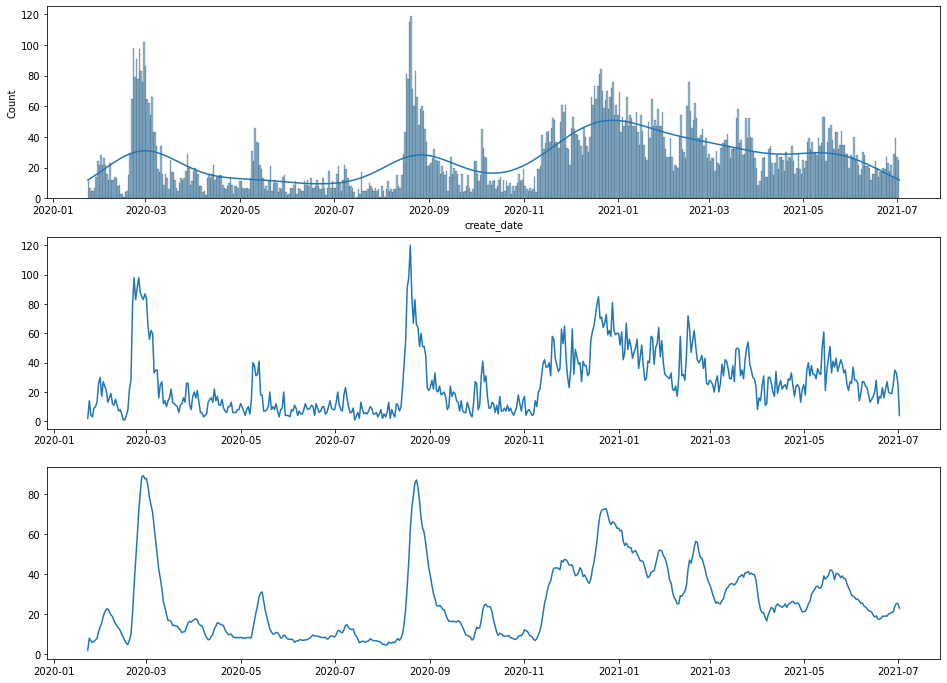

In [28]:
fig,axs=plt.subplots(ncols=1,nrows=3,figsize=(16,12))
plt.subplot(3,1,1)
sns.histplot(data=plz_be_tested,x='create_date',bins=526,kde=True)
axs[1].plot(msg_sent.create_date,msg_sent.amount)
axs[2].plot(msg_sent_smoothed.index, msg_sent_smoothed.amount)

In [30]:
import numpy as np

In [31]:
peaks=find_peaks_cwt(msg_sent_smoothed['amount'].to_numpy(),
                     widths=np.ones(msg_sent_smoothed['amount'].to_numpy().shape)*2)
msg_sent_smoothed.iloc[peaks]

,amount
create_date,
2020-02-05,22.571429
2020-02-27,88.857143
2020-04-17,15.428571
2020-05-15,31.142857
2020-06-18,9.000000
2020-07-10,13.285714
2020-08-22,85.714286
2020-10-08,23.714286
2020-11-28,47.285714


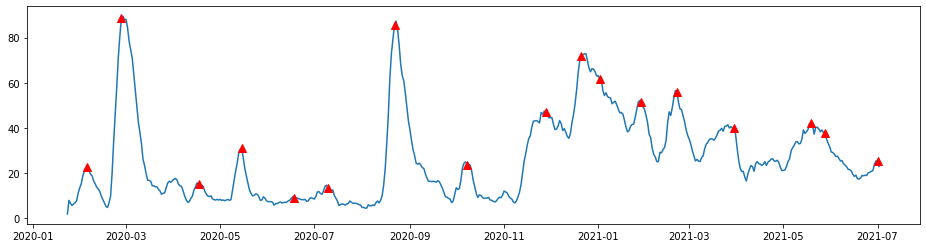

In [33]:
plt.figure(figsize=(16,4))
plt.plot(msg_sent_smoothed)
plt.plot(msg_sent_smoothed.iloc[peaks],'r^',ms=8)

In [34]:
covid_df = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99980 entries, 0 to 99979
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               99980 non-null  object 
 1   continent                              95293 non-null  object 
 2   location                               99980 non-null  object 
 3   date                                   99980 non-null  object 
 4   total_cases                            96383 non-null  float64
 5   new_cases                              96380 non-null  float64
 6   new_cases_smoothed                     95370 non-null  float64
 7   total_deaths                           86237 non-null  float64
 8   new_deaths                             86393 non-null  float64
 9   new_deaths_smoothed                    95370 non-null  float64
 10  total_cases_per_million                95870 non-null  float64
 11  ne

In [38]:
covid_kr=covid_df[covid_df['location']=='South Korea']
covid_kr=covid_kr[covid_kr['date']>='2020-01-23']
covid_kr.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
83642,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.020,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN
83643,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.039,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.000,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN
83644,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.039,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN
83645,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,0.059,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,7.99
83646,KOR,Asia,South Korea,2020-01-27,4.0,1.0,NaN,NaN,NaN,NaN,0.078,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,57.0,0.001,0.0,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,51269183.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN


In [36]:
covid_kr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 83642 to 84169
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               528 non-null    object 
 1   continent                              528 non-null    object 
 2   location                               528 non-null    object 
 3   date                                   528 non-null    object 
 4   total_cases                            528 non-null    float64
 5   new_cases                              528 non-null    float64
 6   new_cases_smoothed                     523 non-null    float64
 7   total_deaths                           500 non-null    float64
 8   new_deaths                             500 non-null    float64
 9   new_deaths_smoothed                    523 non-null    float64
 10  total_cases_per_million                528 non-null    float64
 11  

In [39]:
covid_kr_smoothed=covid_kr['new_cases_smoothed']
covid_kr_smoothed.index=pd.to_datetime(covid_kr['date'])
covid_kr_smoothed.head()

date
2020-01-23   NaN
2020-01-24   NaN
2020-01-25   NaN
2020-01-26   NaN
2020-01-27   NaN
Name: new_cases_smoothed, dtype: float64

In [40]:
covid_kr_raw=covid_kr['new_cases']
covid_kr_raw.index=pd.to_datetime(covid_kr['date'])
covid_kr_raw.head()

date
2020-01-23    0.0
2020-01-24    1.0
2020-01-25    0.0
2020-01-26    1.0
2020-01-27    1.0
Name: new_cases, dtype: float64

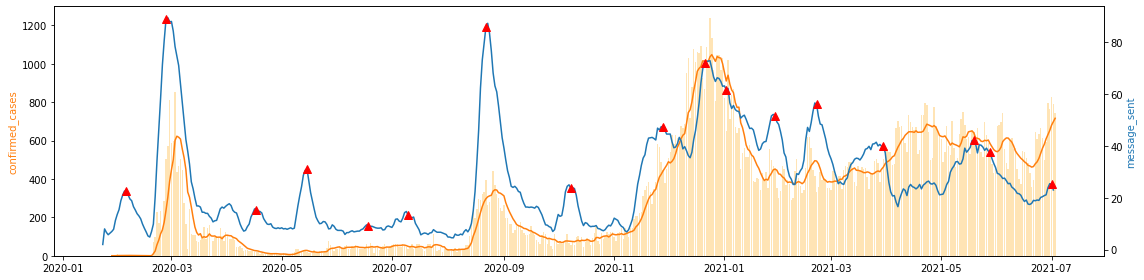

In [41]:
fig,ax1=plt.subplots(figsize=(16,4))
color='tab:orange'
ax1.set_ylabel('confirmed_cases',color=color)
ax1.plot(covid_kr_smoothed,color=color)
ax1.bar(covid_kr_raw.index, covid_kr_raw.values,color='moccasin')
ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('message_sent',color=color)
ax2.plot(msg_sent_smoothed,color=color)
ax2.plot(msg_sent_smoothed.iloc[peaks],'r^',ms=8)
fig.tight_layout()

## NEW!!일일검사자수와 비교

In [42]:
covid_kr_smoothed_daily_test=covid_kr['new_tests_smoothed']
covid_kr_smoothed_daily_test.index=pd.to_datetime(covid_kr['date'])
covid_kr_smoothed_daily_test.head(10)

date
2020-01-23     NaN
2020-01-24     NaN
2020-01-25     NaN
2020-01-26     NaN
2020-01-27     NaN
2020-01-28    25.0
2020-01-29    28.0
2020-01-30    32.0
2020-01-31    40.0
2020-02-01    48.0
Name: new_tests_smoothed, dtype: float64

In [43]:
covid_kr_raw_daily_test=covid_kr['new_tests']
covid_kr_raw_daily_test.index=pd.to_datetime(covid_kr['date'])
covid_kr_raw_daily_test.head(10)

date
2020-01-23      NaN
2020-01-24      NaN
2020-01-25      NaN
2020-01-26      NaN
2020-01-27      9.0
2020-01-28    130.0
2020-01-29      NaN
2020-01-30      NaN
2020-01-31      NaN
2020-02-01      NaN
Name: new_tests, dtype: float64

In [47]:
covid_kr_raw_daily_test.isnull().sum()

71

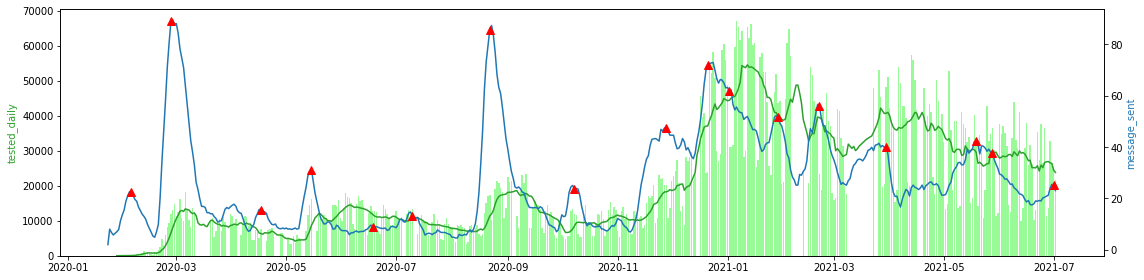

In [46]:
fig,ax1=plt.subplots(figsize=(16,4))

color='tab:green'
ax1.set_ylabel('tested_daily',color=color)
ax1.plot(covid_kr_smoothed_daily_test,color=color)
ax1.bar(covid_kr_raw_daily_test.index, covid_kr_raw_daily_test.values,color='palegreen')

ax2 = ax1.twinx()
color= "tab:blue"
ax2.set_ylabel("message_sent", color=color)
ax2.plot(msg_sent_smoothed, color=color)
ax2.plot(msg_sent_smoothed.iloc[peaks], "r^", ms=8)

fig.tight_layout()

예측:검사 독려하는 재난문자 이후 검사자수 피크가 뒤따를거라 예상했으나 딱히 그렇진 않은듯?  
- 검사비용 변화랑 무기명 검사시점 찾기
- 20.12.14일 이후 수도권의 임시 선별진료소에서 무료검사(보건소는 대상자만)and 무기명 검사 시행.(https://www.hankyung.com/society/article/2020121444617) 
- 21.02.07일 rRT-PCR 진단검사법 개발적용,24시간 정도 걸리던 진단시간을 6시간으로 줄임(http://www.docdocdoc.co.kr)
- 21.04.07일 이후  전국 모든 보건소에서 증상유무와 관계 없이 누구나 무료로 진단 검사)https://www.nocutnews.co.kr/news/5531133
